# Data Analysis

importing libreries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

importing sheet 1

In [2]:
dt=pd.read_excel("DataSets/Patient Record_50.xlsx",sheet_name="Patient Record")
dt.tail(10)

,Sr. No.,Patient Id,Name of Patient,Adhar ID,DOB,Parent ID,Contact No.,Address
40,41,RajMah041,Meena Kanwar Rajput,7332 9104 2268,17-02-2022,RajMahP041,+91 89173 96452,Etapalli
41,42,RajMah042,Arman Ansari,7470 2702 0217,18-03-2023,RajMahP042,+91 61279 57206,Etapalli
42,43,RajMah043,Md Noori,5564 7191 9476,24-02-2022,RajMahP043,+91 61217 36224,Rajura
43,44,RajMah044,Kumari Reena,2968 4492 0292,27-09-2022,RajMahP044,+91 61279 18810,Aheri
44,45,RajMah045,Vikash Gaud,6752 1775 9088,02-01-2023,RajMahP045,+91 788 754 1396,Aheri
45,46,RajMah046,Saurabh Beeryani,2669 6584 6862,10-01-2023,RajMahP046,+91 74476 37119,Aheri
46,47,RajMah047,Upender Khandelwal,8476 3266 0253,01-02-2023,RajMahP047,+91 79313 00662,Rajura
47,48,RajMah048,Preety Hans,5551 6057 0064,19-10-2022,RajMahP048,+91 61279 65206,Etapalli
48,49,RajMah049,Tara Parshad,2048 6014 1774,05-02-2023,RajMahP049,+91 81694 10401,Aheri
49,50,RajMah050,Abdul Kader,2168 6089 4783,28-03-2023,RajMahP050,+91 67108 96197,Gadchiroli


importing sheet 2

In [3]:
dt2=pd.read_excel("DataSets/Measuring Parameter_50.xlsx",sheet_name="Measuring Parameter")
dt2.head()

,Sr.No.,Time,Date,Patient Id,Height (cm),Weight (kg),ForeArm Size (cm),Category of Malnourished Based on Arm Size,BMI,HeartBeat Rate
0,1,15:54,12-09-2023,RajMah001,82.94,11.35,14.99,NAN,16.50,85
1,2,10:10,13-09-2023,RajMah002,95.46,12.47,11.78,MAM,13.68,96
2,3,10:40,13-09-2023,RajMah003,88.71,11.59,14.13,NAN,14.73,126
3,4,11:10,13-09-2023,RajMah004,90.25,19.54,11.74,MAM,23.99,82
4,5,11:20,15-09-2023,RajMah005,89.24,15.98,10.81,SAM,20.07,99


importing 3rd sheet

In [4]:
dt3 = pd.read_excel("DataSets/Result Output_50.xlsx",sheet_name="Result Output")
dt3.head()

,Sr.No.,Patient Id,Time,Date,Malnourished or Not,Type of Malnourishment,Precautionary Measures
0,1,RajMah001,15:54,12-09-2023,Yes,Under Weight,NaN
1,2,RajMah002,10:10,13-09-2023,Yes,Under Weight,NaN
2,3,RajMah003,10:40,13-09-2023,Yes,Under Weight,NaN
3,4,RajMah004,11:10,13-09-2023,No,Normal,NaN
4,5,RajMah005,11:20,15-09-2023,No,Normal,NaN


importing libreries for ploting

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing the regions of Type of Malnourishment

In [6]:
tdf = pd.DataFrame()
tdf["Height"]=dt2["Height (cm)"]
tdf["Weight"] = dt2["Weight (kg)"]
tdf["ToM"] = dt3["Type of Malnourishment"]
tdf.head()

,Height,Weight,ToM
0,82.94,11.35,Under Weight
1,95.46,12.47,Under Weight
2,88.71,11.59,Under Weight
3,90.25,19.54,Normal
4,89.24,15.98,Normal


In [7]:
tdf["ToM"].unique()

array(['Under Weight', 'Normal', 'Over weight'], dtype=object)

In [8]:
tdf[tdf["ToM"]=="Over weight"]

,Height,Weight,ToM
17,81.97,18.29,Over weight


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

preparing data to use ML

In [10]:
X1 = tdf.loc[:,["Height","Weight"]].values
y1 = tdf["ToM"].values
y1 = LabelEncoder().fit_transform(y1)  # encoding 

initializing Logistic Regression Model

In [11]:
lgm = LogisticRegression(fit_intercept=True,max_iter=900)
lgm.fit(X1,y1)

LogisticRegression(max_iter=900)

Plotting the region

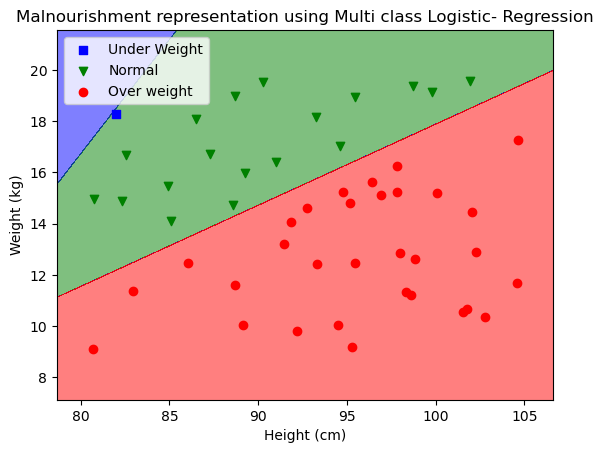

In [12]:


x1,x2 = np.meshgrid(np.arange(start = X1[:,0].min()-3, stop =X1[:,0].max()+3,step = 0.01),
                np.arange(start = X1[:,1].min()-3, stop =X1[:,1].max()+3,step = 0.01))

plt.contourf(x1,x2,
            lgm.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.5, cmap=ListedColormap(["green","blue","red"]))
plt.xlim(X1[:,0].min()-2, X1[:,0].max()+2)
plt.ylim(X1[:,1].min()-2, X1[:,1].max()+2)
plt.scatter(
    tdf[tdf["ToM"]=="Over weight"]["Height"],
    tdf[tdf["ToM"]=="Over weight"]["Weight"],
    marker="s",
    c="blue")
plt.scatter(
    tdf[tdf["ToM"]=="Normal"]["Height"],
    tdf[tdf["ToM"]=="Normal"]["Weight"],
    marker="v",
    c="green")
plt.scatter(
    tdf[tdf["ToM"]=="Under Weight"]["Height"],
    tdf[tdf["ToM"]=="Under Weight"]["Weight"],
    marker="o",
    c="red")
plt.legend(["Under Weight","Normal","Over weight"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title(
    "Malnourishment representation using Multi class Logistic- Regression")
plt.show()

In [13]:
# # for i,j in enumerate(zip(dt2["ForeArm Size (cm)"],dt2["BMI"])):
# plt.scatter(dt2.loc[dt3["Malnourished or Not"]=="Yes","ForeArm Size (cm)"],dt2.loc[dt3["Malnourished or Not"]=="Yes","BMI"],marker="v",label="Yes")

# plt.scatter(dt2.loc[dt3["Malnourished or Not"]=="No","ForeArm Size (cm)"],dt2.loc[dt3["Malnourished or Not"]=="No","BMI"],marker="x",label="No")




# plt.legend()
# plt.xlabel("ForeArm Size (cm)")
# plt.ylabel("BMI")


In [14]:
np.unique(dt2["Category of Malnourished Based on Arm Size"].values)


array(['EU', 'MAM', 'NAN', 'SAM'], dtype=object)

In [15]:
tdf = pd.DataFrame(data=np.append(
        dt2[["BMI","ForeArm Size (cm)","Category of Malnourished Based on Arm Size"]].values,
        dt3["Type of Malnourishment"].values[:,np.newaxis],

        axis=1

    ),columns=["BMI","FAS","ToMbFAS","ToMbBMI"])

tdf.head()

,BMI,FAS,ToMbFAS,ToMbBMI
0,16.5,14.99,NAN,Under Weight
1,13.68,11.78,MAM,Under Weight
2,14.73,14.13,NAN,Under Weight
3,23.99,11.74,MAM,Normal
4,20.07,10.81,SAM,Normal


## Scatter view of type of  Malnourishment based on both ForeArm size and BMI

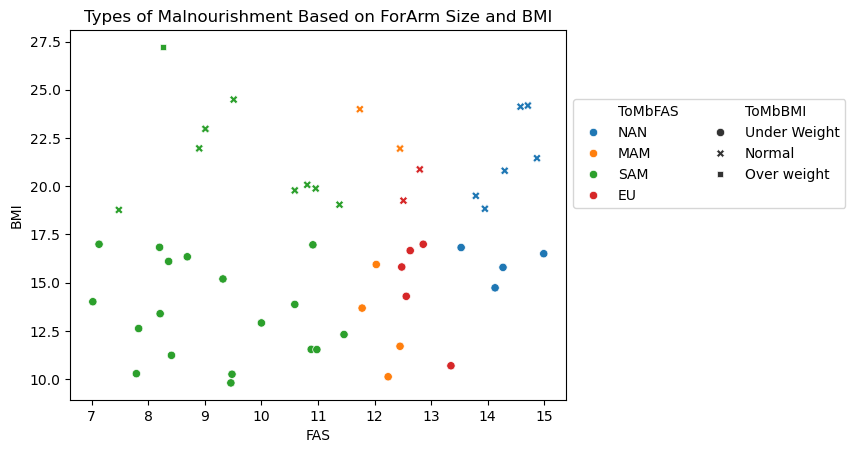

In [16]:
marker = {"Under Weight":"3" , "Normal":"+" , "Over weight":"v"}
spl = sns.scatterplot(data=tdf,
                y="BMI", 
                x = "FAS", 
                hue="ToMbFAS", 
#                 markers=marker,
                style="ToMbBMI")

plt.legend(loc='lower left', 
#            bbox_to_anchor=(0.0,0.75), 
           bbox_to_anchor=(1,0.5), 
           ncol = 2, 
           fancybox=True,
           shadow=False)


plt.title("Types of Malnourishment Based on ForArm Size and BMI")

plt.show()


In [17]:
tdf.rename(columns={"ToMbFAS": "Type of Malnourishement by Fore Arm Size",
                    "ToMbBMI": "Type of Malnourishement by Body Mass Index",
                    "BMI":"Body Mass Index","FAS":"Fore Arm Size"},inplace=True)
tdf.head()

,Body Mass Index,Fore Arm Size,Type of Malnourishement by Fore Arm Size,Type of Malnourishement by Body Mass Index
0,16.5,14.99,NAN,Under Weight
1,13.68,11.78,MAM,Under Weight
2,14.73,14.13,NAN,Under Weight
3,23.99,11.74,MAM,Normal
4,20.07,10.81,SAM,Normal


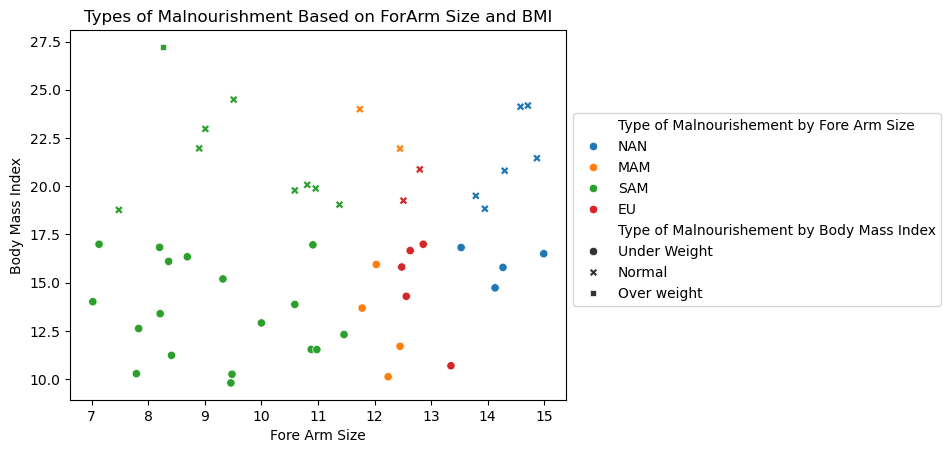

In [18]:
sns.scatterplot(data=tdf,
                y="Body Mass Index", 
                x = "Fore Arm Size", 
                hue="Type of Malnourishement by Fore Arm Size", 
                style="Type of Malnourishement by Body Mass Index")
plt.legend(loc='lower left', 
           bbox_to_anchor=(1,0.235),
           fancybox=True, 
           shadow=False)
plt.title("Types of Malnourishment Based on ForArm Size and BMI")
plt.show()

In [19]:
# def clust(a,b):
#         res = ''
#         if(a<=11.55):
#             res +="SAM"
            
#         elif(11.55<a and a<=12.45):
#             res +="MAM"
#         elif(12.45<a and a<=13.35):
#             res +="EU"
#         elif(13.35<a):
#             res +="NAN"
            
#         res +=" + "
#         if(b< 18.5):
#             res +="Under Weight"
#         elif(18.5 <=b and b<24.9):
#             res +="Normal Weight"
#         elif(24.9 <=b ):
#             res +="Over Weight"
#         return res

In [20]:
# X1 = tdf.loc[:,["Fore Arm Size","Body Mass Index"]].values
# y = np.array([clust(i[0],i[1]) for i in X1])

# x1,x2 = np.meshgrid(np.arange(start =6.5 , stop = 15, step = 0.01),
#                 np.arange(start =10 , stop =30 , step = 0.01))

# y1 = np.array([clust(i[0],i[1]) for i in np.array([x1.ravel(),x2.ravel()]).T])
# # y1.shape, x1.shape, x2.shape
# y1 = np.array(LabelEncoder().fit_transform(y1))
# y1.min()

In [21]:

# x1,x2 = np.meshgrid(np.arange(start =6 , stop = 15, step = 0.01),
#                 np.arange(start =10 , stop =30 , step = 0.01))
# y1 = np.array([clust(i[0],i[1]) for i in np.array([x1.ravel(),x2.ravel()]).T])
# le = LabelEncoder()
# y1 = le.fit_transform(y1)
# cm = plt.get_cmap('gist_rainbow')

# cs = plt.contourf(x1,x2,
#             y1.reshape(x1.shape), 
#             alpha = 0.25, 
#             cmap = ListedColormap([cm(1.*i/11) for i in range(11)]),
#             )
# proxy = [plt.Rectangle((0,0),1,1,
#                        fc = pc.get_facecolor()[0]) for pc in cs.collections]

# lgnds = [le.inverse_transform([i])[0]+f" ({i})" for i in  np.arange(12)]

# plt.legend(proxy, lgnds,
#            loc='lower left',
#            bbox_to_anchor=(1,0.235),
#            fancybox=True, 
#            shadow=False
#           )

# # plt.clabel(cs)

# plt.xlabel("Fore Arm Size")
# plt.ylabel("Body Mass Index")
# plt.xlim(6.2, 14.9)
# plt.ylim(9.9,29.9)
# plt.title("Visualizing areas of Malnourishement")
# plt.show()


## scatter Plot of ForeArm Size v/s Malnourished or Not

In [32]:
tdf["M_BMI"]=dt3["Malnourished or Not"]
tdf.head(8)

,Body Mass Index,Fore Arm Size,Type of Malnourishement by Fore Arm Size,Type of Malnourishement by Body Mass Index,M_BMI
0,16.5,14.99,NAN,Under Weight,Yes
1,13.68,11.78,MAM,Under Weight,Yes
2,14.73,14.13,NAN,Under Weight,Yes
3,23.99,11.74,MAM,Normal,No
4,20.07,10.81,SAM,Normal,No
5,20.8,14.3,NAN,Normal,No
6,12.62,7.83,SAM,Under Weight,Yes
7,24.18,14.71,NAN,Normal,No


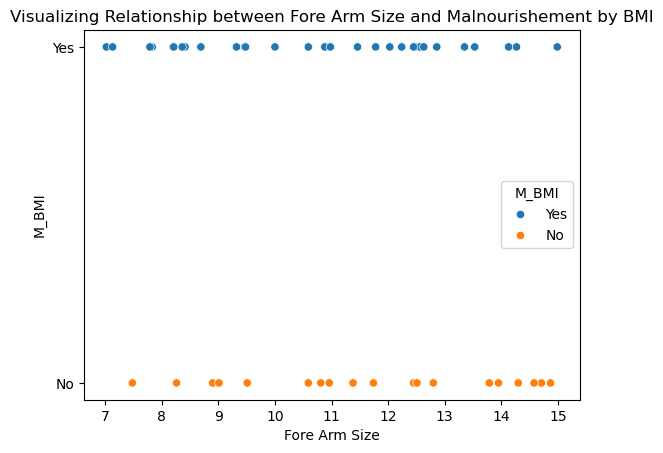

In [33]:
sns.scatterplot(data=tdf,x="Fore Arm Size",
                y="M_BMI",
                hue='M_BMI'
               )
plt.title("Visualizing Relationship between Fore Arm Size and Malnourishement by BMI")
plt.show()

In [34]:
tdf1 = pd.DataFrame()
tdf1["Patient Id"] = dt3["Patient Id"]

tdf1["Height"] = dt2["Height (cm)"]
tdf1["Weight"] = dt2["Weight (kg)"]

tdf1["BMI"] = dt2["BMI"]

tdf1["Fore Arm Size"] = dt2["ForeArm Size (cm)"]
tdf1["Area"] = dt["Address"]
# tdf1["Age"]

#mean,mode,median,sd,percentile,variance
tdf1.head(10)

,Patient Id,Height,Weight,BMI,Fore Arm Size,Area
0,RajMah001,82.94,11.35,16.50,14.99,Rajura
1,RajMah002,95.46,12.47,13.68,11.78,Aheri
2,RajMah003,88.71,11.59,14.73,14.13,Aheri
3,RajMah004,90.25,19.54,23.99,11.74,Aheri
4,RajMah005,89.24,15.98,20.07,10.81,Aheri
5,RajMah006,95.46,18.95,20.80,14.30,Rajura
6,RajMah007,89.16,10.03,12.62,7.83,Gadchiroli
7,RajMah008,86.48,18.08,24.18,14.71,Gadchiroli
8,RajMah009,98.74,19.38,19.88,10.96,Etapalli
9,RajMah010,102.28,12.88,12.31,11.46,Rajura


## Pie chart to observe area/ address wise data distribution

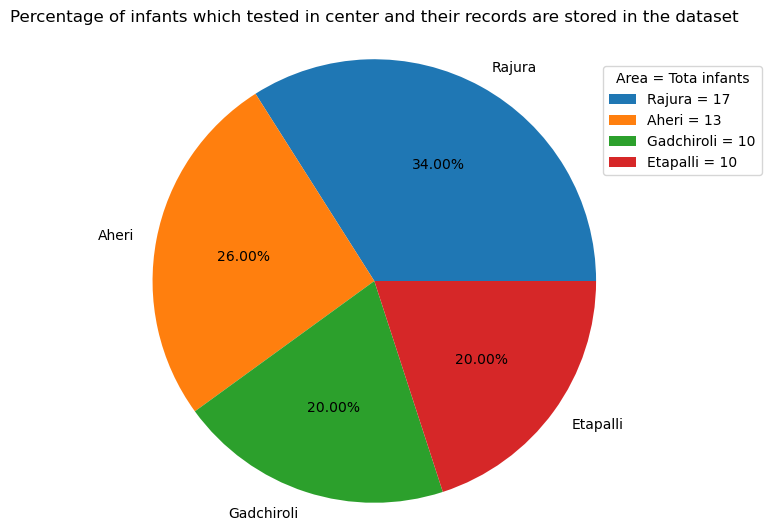

In [35]:
plt.pie(
    tdf1["Area"].value_counts().values,
    labels = tdf1["Area"].value_counts().index,
    autopct = '%1.2f%%',
    radius = 1.5,
    textprops = {"color":"black",'size':10},
    )

labels = [f'{l} = {s}' for l, s in zip(tdf1["Area"].value_counts().index, 
                                       tdf1["Area"].value_counts().values)]

plt.legend(title="Area = Tota infants",
           bbox_to_anchor=(1.1, 1.1), 
           loc='upper left', labels=labels)


plt.title(
    "Percentage of infants which tested in center and their records are stored in the dataset", 
    y=1.18)
plt.show()

In [26]:
tdf1.head()

,Patient Id,Height,Weight,BMI,Fore Arm Size,Area
0,RajMah001,82.94,11.35,16.50,14.99,Rajura
1,RajMah002,95.46,12.47,13.68,11.78,Aheri
2,RajMah003,88.71,11.59,14.73,14.13,Aheri
3,RajMah004,90.25,19.54,23.99,11.74,Aheri
4,RajMah005,89.24,15.98,20.07,10.81,Aheri


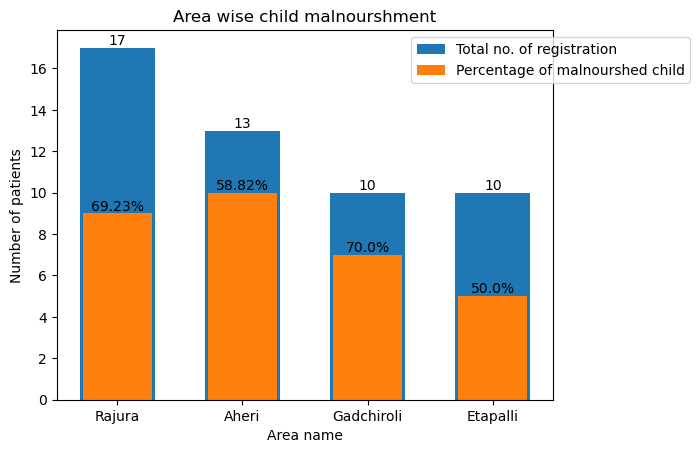

In [37]:
ttl = plt.bar(
    tdf1["Area"].value_counts().index, 
    tdf1["Area"].value_counts().values,
    width=.6
    )

yes = plt.bar(tdf1[dt3["Malnourished or Not"]== "Yes"]["Area"].value_counts().index, 
        tdf1[dt3["Malnourished or Not"]== "Yes"]["Area"].value_counts().values,
        width=.55,
        bottom=.0,
        #align='center'
       )

yslables = [ f"{round(y*100/t,2)}%" for y, t in zip(
    tdf1[dt3["Malnourished or Not"]== "Yes"]["Area"].value_counts().values,
    tdf1["Area"].value_counts().values
    )]

ttlb = [f"{i}" for i in tdf1["Area"].value_counts().values]

plt.bar_label(yes,yslables)
plt.bar_label(ttl,ttlb)
plt.title(
    "Area wise child malnourshment", 
    )
lgnd = ["Total no. of registration", "Percentage of malnourshed child"]
plt.legend(
#     title="Area = Tota infants",
    bbox_to_anchor=(.7, 1),
    loc='upper left', labels=lgnd)
plt.xlabel("Area name")
plt.ylabel("Number of patients")
plt.show()

In [38]:
tdf1.head()

,Patient Id,Height,Weight,BMI,Fore Arm Size,Area
0,RajMah001,82.94,11.35,16.50,14.99,Rajura
1,RajMah002,95.46,12.47,13.68,11.78,Aheri
2,RajMah003,88.71,11.59,14.73,14.13,Aheri
3,RajMah004,90.25,19.54,23.99,11.74,Aheri
4,RajMah005,89.24,15.98,20.07,10.81,Aheri


# description of Height, Weight, ForeArm Size and BMI

In [39]:

report = tdf1.describe().T.copy()
report =report[["count","mean","std","25%","50%","75%","min","max"]]
report = report.rename({"count":"Count",
                       "mean":"Mean",
                       "std":"Standard Deviation",
                       "min":"MIN",
                       "max":"MAX"})
report

,count,mean,std,25%,50%,75%,min,max
Height,50.0,93.3910,6.709073,88.6875,94.54,98.5300,80.67,104.61
Weight,50.0,14.4166,3.035424,11.8775,14.77,16.6225,9.12,19.56
BMI,50.0,16.8198,4.436348,13.4625,16.58,19.8550,9.80,27.22
Fore Arm Size,50.0,11.1324,2.330650,9.0875,11.18,12.7575,7.02,14.99


In [40]:
report = tdf1.describe().T.copy()
report =report[["count","mean","std","25%","50%","75%","min","max"]]
report

,count,mean,std,25%,50%,75%,min,max
Height,50.0,93.3910,6.709073,88.6875,94.54,98.5300,80.67,104.61
Weight,50.0,14.4166,3.035424,11.8775,14.77,16.6225,9.12,19.56
BMI,50.0,16.8198,4.436348,13.4625,16.58,19.8550,9.80,27.22
Fore Arm Size,50.0,11.1324,2.330650,9.0875,11.18,12.7575,7.02,14.99


## Histogram

In [42]:
dt3.head()

,Sr.No.,Patient Id,Time,Date,Malnourished or Not,Type of Malnourishment,Precautionary Measures
0,1,RajMah001,15:54,12-09-2023,Yes,Under Weight,NaN
1,2,RajMah002,10:10,13-09-2023,Yes,Under Weight,NaN
2,3,RajMah003,10:40,13-09-2023,Yes,Under Weight,NaN
3,4,RajMah004,11:10,13-09-2023,No,Normal,NaN
4,5,RajMah005,11:20,15-09-2023,No,Normal,NaN


In [43]:
dt.head()

,Sr. No.,Patient Id,Name of Patient,Adhar ID,DOB,Parent ID,Contact No.,Address
0,1,RajMah001,Manju Bai,3465 4557 4665,19-12-2022,RajMahP001,+91 61215 09667,Rajura
1,2,RajMah002,Suresh Kumar,3964 9166 4368,03-04-2023,RajMahP002,+91 61279 00191,Aheri
2,3,RajMah003,Mehphal Singh,1545 2403 2982,10-12-2022,RajMahP003,+91 61279 27293,Aheri
3,4,RajMah004,Shama Praveen,3570 8358 5245,01-05-2022,RajMahP004,+91 61279 78747,Aheri
4,5,RajMah005,Lal Chand,6637 2041 6760,25-04-2022,RajMahP005,+91 72836 80352,Aheri


In [44]:
dt2.head()

,Sr.No.,Time,Date,Patient Id,Height (cm),Weight (kg),ForeArm Size (cm),Category of Malnourished Based on Arm Size,BMI,HeartBeat Rate
0,1,15:54,12-09-2023,RajMah001,82.94,11.35,14.99,NAN,16.50,85
1,2,10:10,13-09-2023,RajMah002,95.46,12.47,11.78,MAM,13.68,96
2,3,10:40,13-09-2023,RajMah003,88.71,11.59,14.13,NAN,14.73,126
3,4,11:10,13-09-2023,RajMah004,90.25,19.54,11.74,MAM,23.99,82
4,5,11:20,15-09-2023,RajMah005,89.24,15.98,10.81,SAM,20.07,99


finding age of childrenes in days

In [45]:
mesured = pd.to_datetime(dt2["Date"],format='%d-%m-%Y')
dob = pd.to_datetime(dt["DOB"],format='%d-%m-%Y')

tdf2 = pd.DataFrame()
tdf2["Patient Id"] = dt2['Patient Id']
tdf2["Age in days"] = (mesured - dob) / np.timedelta64(1, 'D')

tdf2['Malnourished or Not'] = dt3["Malnourished or Not"]


tdf2.head()

,Patient Id,Age in days,Malnourished or Not
0,RajMah001,267.0,Yes
1,RajMah002,163.0,Yes
2,RajMah003,277.0,Yes
3,RajMah004,500.0,No
4,RajMah005,508.0,No


### Histogram

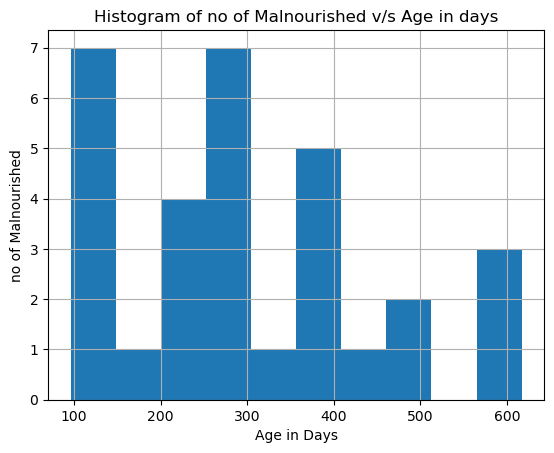

In [46]:
tdf2[tdf2['Malnourished or Not']=="Yes"]["Age in days"].hist()
plt.xlabel("Age in Days")
plt.ylabel("no of Malnourished")
plt.title("Histogram of no of Malnourished v/s Age in days")
plt.show()

Categorize data by age in months

In [47]:
days = tdf2["Age in days"].to_list()
months =[]
for i in days:
    t = i
    l=1
    while(t>30):
        t -= 30
        l +=1
#     months.append(str(l))
    months.append(l)
tdf2["months"] = months
tdf2.head()

,Patient Id,Age in days,Malnourished or Not,months
0,RajMah001,267.0,Yes,9
1,RajMah002,163.0,Yes,6
2,RajMah003,277.0,Yes,10
3,RajMah004,500.0,No,17
4,RajMah005,508.0,No,17


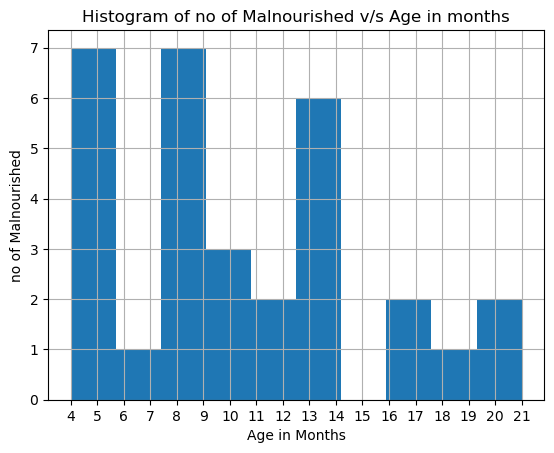

In [48]:
hst = tdf2[tdf2['Malnourished or Not']=="Yes"]["months"]
hst.hist(bins = 10)
plt.xticks(np.arange(hst.min(),hst.max()+1))
plt.xlabel("Age in Months")
plt.ylabel("no of Malnourished")
plt.title("Histogram of no of Malnourished v/s Age in months")
plt.show()

# Making data of Recovery from Malnourishement

In [49]:
import random as rnd
dt2["Category of Malnourished Based on Arm Size"].unique()

array(['NAN', 'MAM', 'SAM', 'EU'], dtype=object)

In [50]:
recovery = []
cate = dt2["Category of Malnourished Based on Arm Size"].values
for i in cate:
    if(i == "SAM"):
        rn = rnd.randint(95,120)
    elif(i == "MAM"):
        rn = rnd.randint(75,95)
    elif(i == "EU"):
        rn = rnd.randint(65,75)
    elif(i == "NAN"):
        rn = rnd.randint(55,65)
    recovery.append(rn)


In [51]:
tdf3 = dt2[["ForeArm Size (cm)","Category of Malnourished Based on Arm Size"]]
tdf3["recovery"] = recovery
tdf3.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9632\3477918296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf3["recovery"] = recovery


,ForeArm Size (cm),Category of Malnourished Based on Arm Size,recovery
0,14.99,NAN,65
1,11.78,MAM,76
2,14.13,NAN,60
3,11.74,MAM,85
4,10.81,SAM,98


# making Dataset

In [52]:
reco_dat =pd.DataFrame()
reco_dat["PatintId"] = dt2["Patient Id"]
reco_dat["Measured_date"] = dt2["Date"]
reco_dat["Type_of_malnourishment(FAS)"] = dt2["Category of Malnourished Based on Arm Size"]
reco_dat["Type_of_malnourishment(BMI)"] = dt3["Type of Malnourishment"]
reco_dat["Type of Malnourishment(BMI + FAS)"] = dt3["Type of Malnourishment"] +"+"+ dt2["Category of Malnourished Based on Arm Size"]
# reco_dat["Recovery(FAS)"] = recovery
reco_dat.head()

,PatintId,Measured_date,Type_of_malnourishment(FAS),Type_of_malnourishment(BMI),Type of Malnourishment(BMI + FAS)
0,RajMah001,12-09-2023,NAN,Under Weight,Under Weight+NAN
1,RajMah002,13-09-2023,MAM,Under Weight,Under Weight+MAM
2,RajMah003,13-09-2023,NAN,Under Weight,Under Weight+NAN
3,RajMah004,13-09-2023,MAM,Normal,Normal+MAM
4,RajMah005,15-09-2023,SAM,Normal,Normal+SAM


In [53]:
reco_dat["Type of Malnourishment(BMI + FAS)"].unique()

array(['Under Weight+NAN', 'Under Weight+MAM', 'Normal+MAM', 'Normal+SAM',
       'Normal+NAN', 'Under Weight+SAM', 'Under Weight+EU',
       'Over weight+SAM', 'Normal+EU'], dtype=object)

Generating recovery time days according to types of Malnourishement based on BMI and ForeArm Size combinely

In [54]:
cate = reco_dat["Type of Malnourishment(BMI + FAS)"].values
recovery = []
for i in cate:
    
    if(i == 'Under Weight+NAN'):
        rn = rnd.randint(60,70)
    elif(i == 'Under Weight+SAM'):
        rn = rnd.randint(100,140)
    elif(i == 'Under Weight+EU'):
        rn = rnd.randint(70,84)
    elif(i == 'Under Weight+MAM'):
        rn = rnd.randint(85,100)
        
    elif(i == 'Normal+SAM'):
        rn = rnd.randint(90,100)
    elif(i == 'Normal+MAM'):
        rn = rnd.randint(75,90)
    elif(i ==  'Normal+NAN'):
        rn = rnd.randint(50,60)
    elif(i ==  'Normal+EU'):
        rn = rnd.randint(60,75)
        
    elif(i == 'Over weight+SAM'):
        rn = rnd.randint(100,140)
    elif(i == 'Over weight+MAM'):
        rn = rnd.randint(85,99)
    elif(i == 'Over weight+EU'):
        rn = rnd.randint(70,85)
    elif(i == 'Over weight+NAN'):
        rn = rnd.randint(60,70)
    
    recovery.append(rn)
    
    
    

In [55]:
reco_dat["recovery_days(BMI+FAS)"] = recovery
reco_dat.head()

,PatintId,Measured_date,Type_of_malnourishment(FAS),Type_of_malnourishment(BMI),Type of Malnourishment(BMI + FAS),recovery_days(BMI+FAS)
0,RajMah001,12-09-2023,NAN,Under Weight,Under Weight+NAN,61
1,RajMah002,13-09-2023,MAM,Under Weight,Under Weight+MAM,96
2,RajMah003,13-09-2023,NAN,Under Weight,Under Weight+NAN,62
3,RajMah004,13-09-2023,MAM,Normal,Normal+MAM,76
4,RajMah005,15-09-2023,SAM,Normal,Normal+SAM,97


Saving 6the dataset at <b>Recovery data(BMI+FAS)_50.xlsx</b>

In [56]:
reco_dat.to_excel("DataSets/Recovery data(BMI+FAS)_50.xlsx", index=False)

# Scatter Plot of Type of Malnourishment(BMI + FAS) v/s recovery days  

In [57]:
X = reco_dat["Type of Malnourishment(BMI + FAS)"].values
Y = reco_dat["recovery_days(BMI+FAS)"].values

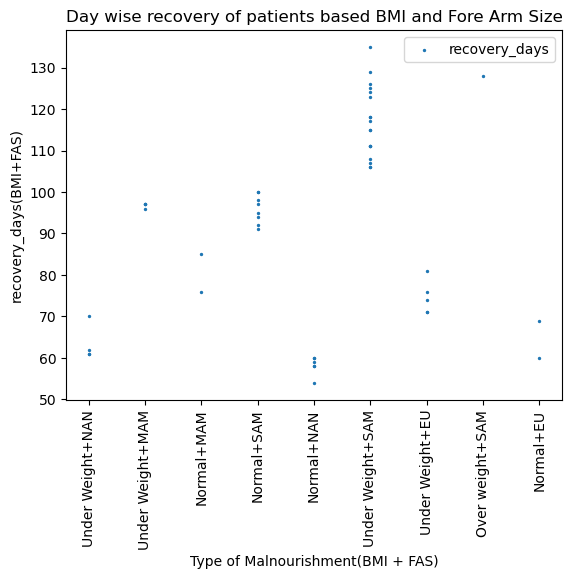

In [58]:
plt.scatter(X,Y,label="recovery_days",s=2)
plt.xlabel("Type of Malnourishment(BMI + FAS)")
plt.ylabel("recovery_days(BMI+FAS)")
plt.xticks(rotation='vertical')
plt.legend()
plt.title("Day wise recovery of patients based BMI and Fore Arm Size")
plt.show()

In [59]:
# plt.scatter(X_en,Y,label="recovery_days",s=2)
# plt.xlabel("Type of Malnourishment(BMI + FAS)")
# plt.ylabel("recovery_days(BMI+FAS)")
# # plt.xticks(rotation='vertical')
# plt.legend()


In [60]:
tm = reco_dat.groupby("Type of Malnourishment(BMI + FAS)")["recovery_days(BMI+FAS)"].max()
tm  = tm.sort_values()
tm

Type of Malnourishment(BMI + FAS)
Normal+NAN           60
Normal+EU            69
Under Weight+NAN     70
Under Weight+EU      81
Normal+MAM           85
Under Weight+MAM     97
Normal+SAM          100
Over weight+SAM     128
Under Weight+SAM    135
Name: recovery_days(BMI+FAS), dtype: int64

In [61]:
xx = pd.Series(tm.index)
xx

0          Normal+NAN
1           Normal+EU
2    Under Weight+NAN
3     Under Weight+EU
4          Normal+MAM
5    Under Weight+MAM
6          Normal+SAM
7     Over weight+SAM
8    Under Weight+SAM
Name: Type of Malnourishment(BMI + FAS), dtype: object

## Recovery time sample  for a patient

In [62]:
visits = pd.DataFrame()
visits["BMI"] = [14,14,16,19,21,23]
visits["FAS"] = [8,8.5,9.5,10,10.5,10.6]
visits

,BMI,FAS
0,14,8.0
1,14,8.5
2,16,9.5
3,19,10.0
4,21,10.5
5,23,10.6


In [63]:
X = visits.index.to_list()
y1 = visits['BMI'].values
y2 = visits['FAS'].values

In [64]:
X = np.array(X).reshape(len(X),1)
y1 = np.array(y1).reshape(len(y1),1)
y2 = np.array(y2).reshape(len(y2),1)

In [65]:
from sklearn.linear_model import LinearRegression

## Prediction of BMI and ForeArm Size values for next visit 

In [66]:
model_1 = LinearRegression(fit_intercept=True)
model_2 = LinearRegression(fit_intercept=True)
model_1.fit(X,y1)
model_2.fit(X,y2)

LinearRegression()

Text(0.5, 1.0, 'Next visit BMI and ForeArm Size Prediction')

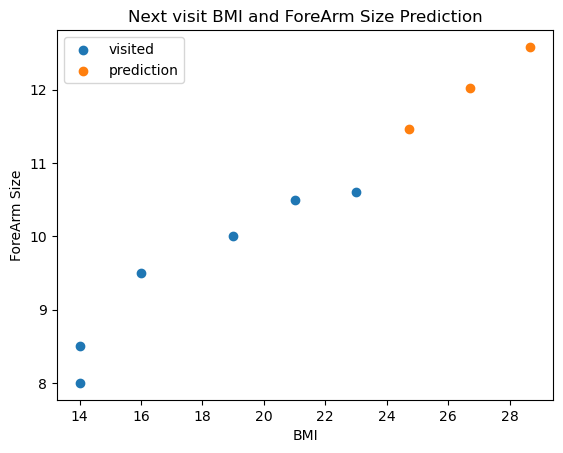

In [67]:
y_1 = model_1.predict([[6],[7],[8]])
y_2 = model_2.predict([[6],[7],[8]])
plt.scatter(data=visits,x="BMI",y="FAS",label="visited")
plt.scatter(y_1,y_2,label="prediction")
plt.xlabel("BMI")
plt.ylabel("ForeArm Size")
plt.legend()
plt.title("Next visit BMI and ForeArm Size Prediction")

### Visualizing the linear regression model

Text(0.5, 1.0, 'next visit BMI and ForeArm Sizeprediction')

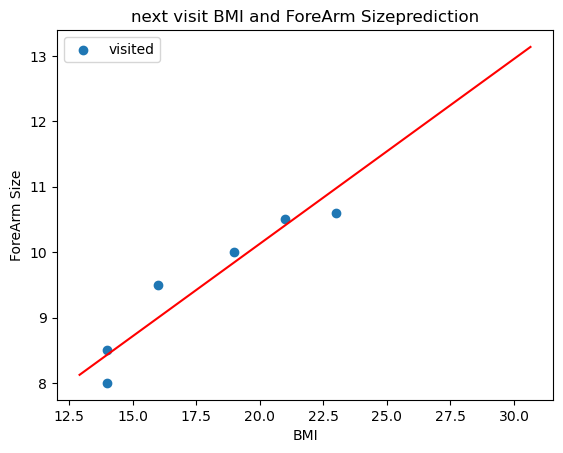

In [69]:
vs = np.linspace(0,9)
vs = vs.reshape(len(vs),1)
y_1s = model_1.predict(vs)
y_2s = model_2.predict(vs)
plt.scatter(data=visits,x="BMI",y="FAS",label="visited")
plt.plot(y_1s, y_2s,c="red")

# plt.scatter(y_1,y_2,label="prediction")
plt.xlabel("BMI")
plt.ylabel("ForeArm Size")
plt.legend()
plt.title("next visit BMI and ForeArm Sizeprediction")

<Axes: xlabel='BMI', ylabel='FAS'>

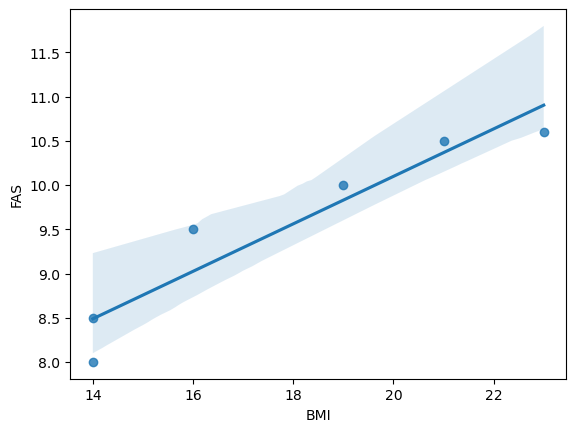

In [70]:
sns.regplot(data=visits, x="BMI",y="FAS")